<a href="https://colab.research.google.com/github/slaninam/MCDA/blob/master/exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eploration of crowdsourced measurement data

with map display of relevant values

### Prepare data

Download statistics file from an RMBT server, unzip and read into a data frame.

In [63]:
import pandas as pd
import urllib.request
import zipfile

from pathlib import Path

datafile = Path('data.zip')

# Download data file from the RMBT server (RTR or CTU)
# TODO: Specify range of times to process, make source adjustable or merge
if not datafile.exists():
  print('Retrieving data file')
  url = 'https://m-cloud.netztest.at/RMBTStatisticServer/export/netztest-opendata-2019-09.zip'
  #url = 'https://control.netmetr.cz/RMBTStatisticServer/export/NetMetr-opendata-2019-09.zip'
  urllib.request.urlretrieve(url, 'data.zip')

# Extract the data archive and read into a data frame
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('')
df = pd.read_csv('netztest-opendata-2019-09.csv')
#df = pd.read_csv('NetMetr-opendata-2019-09.csv')

# Print out the length of the data frame and the list of columns
print('No. of entries: {:,}'.format(len(df)))
print(sorted(list(df)))

No. of entries: 266,947
['asn', 'cat_technology', 'cell_area_code', 'cell_location_id', 'channel_number', 'client_version', 'country_location', 'download_kbit', 'dtm_level', 'edge_id', 'gkz', 'gkz_sa', 'implausible', 'ip_anonym', 'kg_nr', 'land_cover', 'lat', 'link_distance', 'link_frc', 'link_id', 'link_name', 'loc_accuracy', 'loc_src', 'long', 'lte_rsrp', 'lte_rsrq', 'model', 'nat_type', 'ndt_download_kbit', 'ndt_upload_kbit', 'network_mcc_mnc', 'network_name', 'network_type', 'num_threads', 'open_test_uuid', 'open_uuid', 'ping_ms', 'pinned', 'platform', 'radio_band', 'server_name', 'settlement_type', 'signal_classification', 'signal_strength', 'sim_mcc_mnc', 'test_duration', 'time_utc', 'upload_kbit', 'zip_code']


### Display selected data on map

The data to be displayed can be filtered according to different values. Also the displayed quantity (dot colour) can be selected by modifying the *column* parameter in the plot command



In [0]:
# Install geopandas and contextily for map display
!pip install geopandas
!pip install contextily==1.0rc2

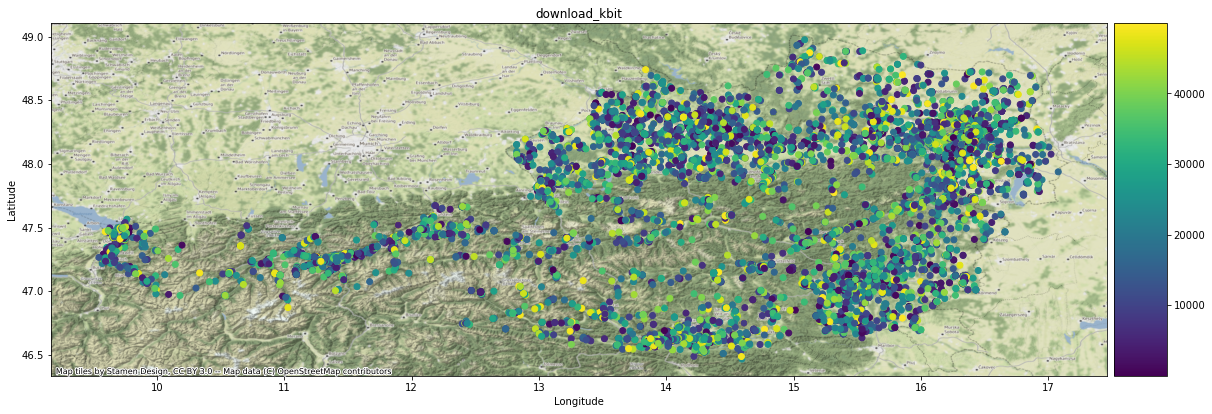

In [5]:
import geopandas
import matplotlib.pyplot as mpl
import contextily as ctx
from shapely.geometry import Point
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Filter which data shall be displayed, print the size of the sample
lte = df[df['network_type'] == 'LTE'] 
lte = lte[lte['country_location'] == 'AT']
lte = lte[lte['download_kbit'] < 50000] 
what_to_display = 'download_kbit'

# Prepare axes for legend
fig,ax = plt.subplots(1,1,figsize = (20,10))
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)

# Prepare data
crs={'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(lte['long'], lte['lat'])]
geo_df = geopandas.GeoDataFrame(lte, crs = crs, geometry = geometry)

# Plot data and backrgound map
geo_df.plot(ax=ax, cax=cax, column=what_to_display, legend='True')
ax.set_title(what_to_display)
ax.xaxis.set_label_text('Longitude')
ax.yaxis.set_label_text('Latitude')
ctx.add_basemap(ax, crs=geo_df.crs)

### Get detailed statistics for a specific entry 

https://www.netztest.at/en/OpenDataSpecification.html

In [30]:
open_test_uuid = lte['open_test_uuid'].iloc[0]

def retrieve_json(open_test_uuid):
    print('open_test_uuid: ' + open_test_uuid)

    url = 'https://data.netztest.at/opendata/opentests/' + open_test_uuid +'?verbose=1'

    if not Path(open_test_uuid + '.json').exists():
        try:
            print('Retrieving JSON file ...')
            urllib.request.urlretrieve(url, open_test_uuid + '.json')
        except:
            print('Error: Download failed.')
        print('Done.')
    else:
        print('json stored locally, nothing to do.')
    return


def json_to_dict(uuid):
    import json
    jsstring = open(uuid + '.json').read()
    jsdata = json.loads(jsstring)
    # pd.read_json(open_test_uuid + '.json', orient = 'records')
    return jsdata
        
        
retrieve_json(open_test_uuid)
data = json_to_dict(open_test_uuid)
print(data['speed_curve'])

# Request for json of a set of complete tests
#url = 'https://www.netztest.at/opendata/opentests/search?lat=>48.09&lat=<48.35&long=>16.14&long=<16.62&loc_accuracy=>0&loc_accuracy=<2000&max_results=10'
#print(url)

open_test_uuid: Oe2ae1c19-f2f5-441b-af72-3bb223f4c1bd
json stored locally, nothing to do.
{'download': [{'bytes_total': 8207.0, 'time_elapsed': 27}, {'bytes_total': 10359.0, 'time_elapsed': 33}, {'bytes_total': 232460.0, 'time_elapsed': 140}, {'bytes_total': 246200.0, 'time_elapsed': 147}, {'bytes_total': 359597.0, 'time_elapsed': 202}, {'bytes_total': 443465.0, 'time_elapsed': 243}, {'bytes_total': 615722.0, 'time_elapsed': 338}, {'bytes_total': 627545.0, 'time_elapsed': 345}, {'bytes_total': 874292.0, 'time_elapsed': 448}, {'bytes_total': 892246.0, 'time_elapsed': 460}, {'bytes_total': 928071.0, 'time_elapsed': 482}, {'bytes_total': 1050188.0, 'time_elapsed': 554}, {'bytes_total': 1258472.0, 'time_elapsed': 659}, {'bytes_total': 1333682.0, 'time_elapsed': 689}, {'bytes_total': 1516032.0, 'time_elapsed': 760}, {'bytes_total': 1572145.0, 'time_elapsed': 791}, {'bytes_total': 1576840.0, 'time_elapsed': 794}, {'bytes_total': 1695976.0, 'time_elapsed': 860}, {'bytes_total': 1861995.0, 'ti

In [69]:
sms = df[df['download_kbit'] < 100000]
sms = sms.dropna(subset = ['lte_rsrp','download_kbit'])#, 'channel_number', 'radio_band'])
sorted(sms['lte_rsrp'].unique())

[-140.0,
 -139.0,
 -137.0,
 -136.0,
 -134.0,
 -133.0,
 -131.0,
 -130.0,
 -129.0,
 -128.0,
 -127.0,
 -126.0,
 -125.0,
 -124.0,
 -123.0,
 -122.0,
 -121.0,
 -120.0,
 -119.0,
 -118.0,
 -117.0,
 -116.0,
 -115.0,
 -114.0,
 -113.0,
 -112.0,
 -111.0,
 -110.0,
 -109.0,
 -108.0,
 -107.0,
 -106.0,
 -105.0,
 -104.0,
 -103.0,
 -102.0,
 -101.0,
 -100.0,
 -99.0,
 -98.0,
 -97.0,
 -96.0,
 -95.0,
 -94.0,
 -93.0,
 -92.0,
 -91.0,
 -90.0,
 -89.0,
 -88.0,
 -87.0,
 -86.0,
 -85.0,
 -84.0,
 -83.0,
 -82.0,
 -81.0,
 -80.0,
 -79.0,
 -78.0,
 -77.0,
 -76.0,
 -75.0,
 -74.0,
 -73.0,
 -72.0,
 -71.0,
 -70.0,
 -69.0,
 -68.0,
 -67.0,
 -66.0,
 -65.0,
 -64.0,
 -63.0,
 -62.0,
 -61.0,
 -60.0,
 -59.0,
 -57.0,
 -56.0,
 -55.0,
 -51.0,
 -28.0,
 -25.0,
 -18.0,
 -17.0,
 -16.0,
 -14.0,
 -13.0,
 -12.0,
 -11.0,
 -10.0,
 -9.0,
 -8.0]

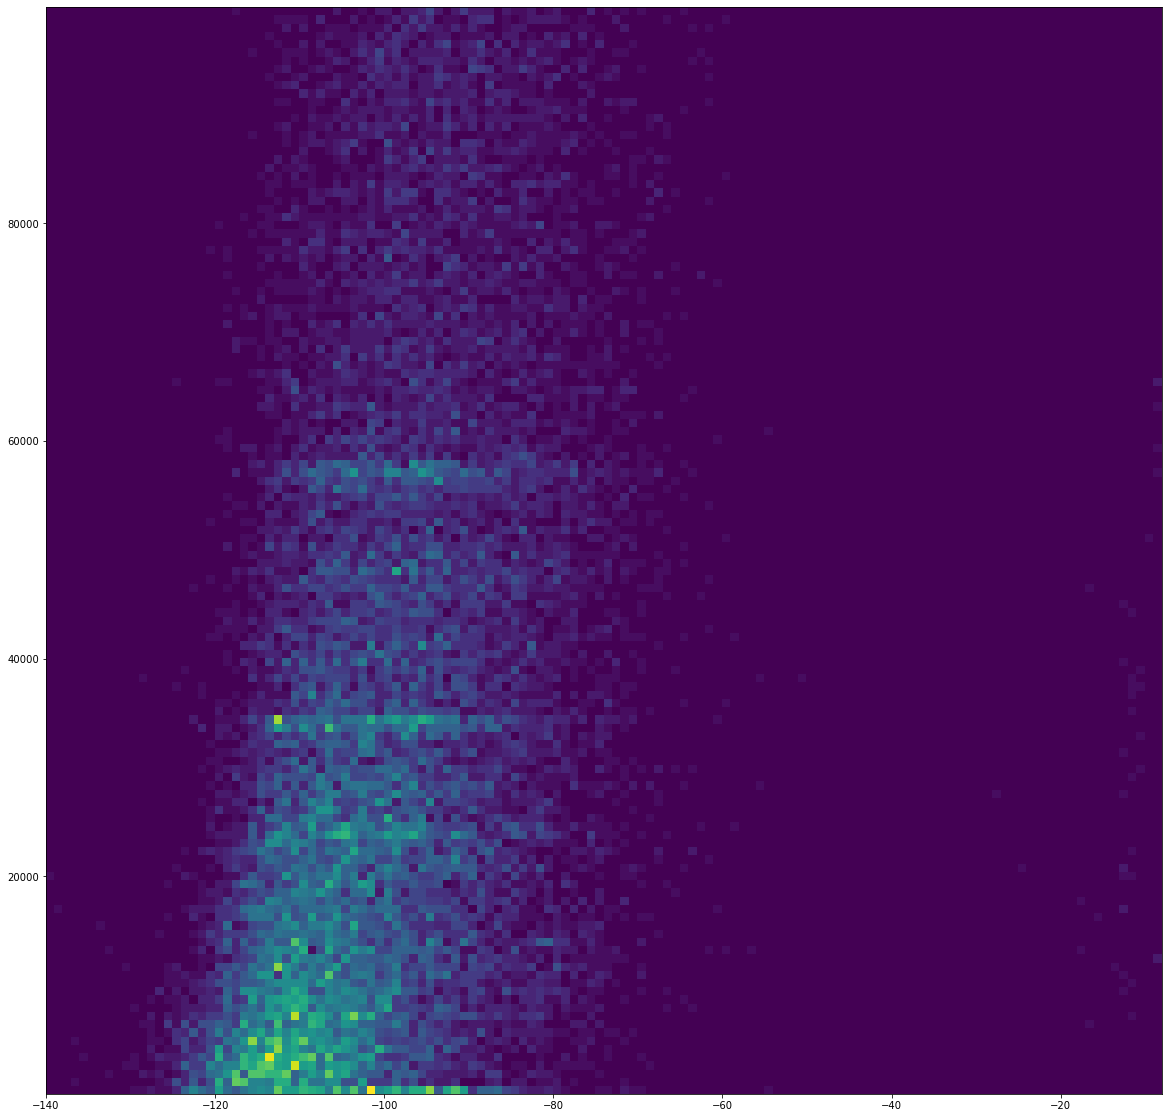

In [72]:
import matplotlib.pyplot as plt

fix, ax = plt.subplots(1,1,figsize = (20,20))
ax.hist2d(sms['lte_rsrp'],sms['download_kbit'], bins=sms['lte_rsrp'].unique().max() - sms['lte_rsrp'].unique().min())
plt.show()